In [1]:
import pandas as pd
from google.colab import files

# This will open a file upload dialog
print("Please upload your AirQuality.csv file:")
uploaded = files.upload()

# Get the filename of the uploaded file
file_name = next(iter(uploaded))

print(f"\nSuccessfully uploaded {file_name}!")

# --- Now we load the data into a pandas DataFrame ---

# Load the dataset
# The data is separated by semicolons, decimal points are commas,
# -200 represents missing values, and we need to handle empty columns at the end.
air_quality_df = pd.read_csv(
    file_name,
    sep=';',
    decimal=',',
    na_values='-200',
    usecols=lambda x: not x.strip() == '' # Skips the trailing empty columns
)

# Let's see if it loaded correctly
print("\n--- Initial Data Exploration ---")

# Display the first 5 rows of the dataframe
print("\nFirst 5 rows of the dataset:")
print(air_quality_df.head())

# Get a summary, including data types and non-null values
print("\nDataset Info:")
air_quality_df.info()

Please upload your AirQuality.csv file:


Saving AirQuality.csv to AirQuality.csv

Successfully uploaded AirQuality.csv!

--- Initial Data Exploration ---

First 5 rows of the dataset:
         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0     

Data Ceanling and preprocessing

In [2]:
import pandas as pd
import numpy as np

# It's good practice to work on a copy
df_clean = air_quality_df.copy()

# 1. Drop the empty and unnecessary columns
df_clean.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True)

# Also, the 'NMHC(GT)' column is almost entirely empty, let's remove it too.
df_clean.drop(columns=['NMHC(GT)'], inplace=True)

# 2. Handle rows where Date or Time is missing before we combine them
df_clean.dropna(subset=['Date', 'Time'], inplace=True)

# 3. Combine 'Date' and 'Time' into a single 'DateTime' column
df_clean['DateTime'] = df_clean['Date'] + ' ' + df_clean['Time']
df_clean['DateTime'] = pd.to_datetime(df_clean['DateTime'], format='%d/%m/%Y %H.%M.%S')

# 4. Set 'DateTime' as the index for time-series analysis
df_clean.set_index('DateTime', inplace=True)
df_clean.drop(columns=['Date', 'Time'], inplace=True)

# 5. Handle the rest of the missing values (-200)
# For time-series data, forward-filling is a good initial strategy.
df_clean.fillna(method='ffill', inplace=True)

# --- Let's check the result! ---
print("--- After Cleaning and Preprocessing ---")

# Verify there are no more null values
print("\nDataset Info:")
df_clean.info()

# Display the first few rows of the cleaned dataframe
print("\nFirst 5 rows of the cleaned dataset:")
print(df_clean.head())

--- After Cleaning and Preprocessing ---

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   C6H6(GT)       9357 non-null   float64
 3   PT08.S2(NMHC)  9357 non-null   float64
 4   NOx(GT)        9357 non-null   float64
 5   PT08.S3(NOx)   9357 non-null   float64
 6   NO2(GT)        9357 non-null   float64
 7   PT08.S4(NO2)   9357 non-null   float64
 8   PT08.S5(O3)    9357 non-null   float64
 9   T              9357 non-null   float64
 10  RH             9357 non-null   float64
 11  AH             9357 non-null   float64
dtypes: float64(12)
memory usage: 950.3 KB

First 5 rows of the cleaned dataset:
                     CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
DateTime                  

/tmp/ipython-input-3175956767.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean.fillna(method='ffill', inplace=True)


Exploratory Data Analysis (EDA)


--- Plotting Pollutant Concentrations Over Time ---


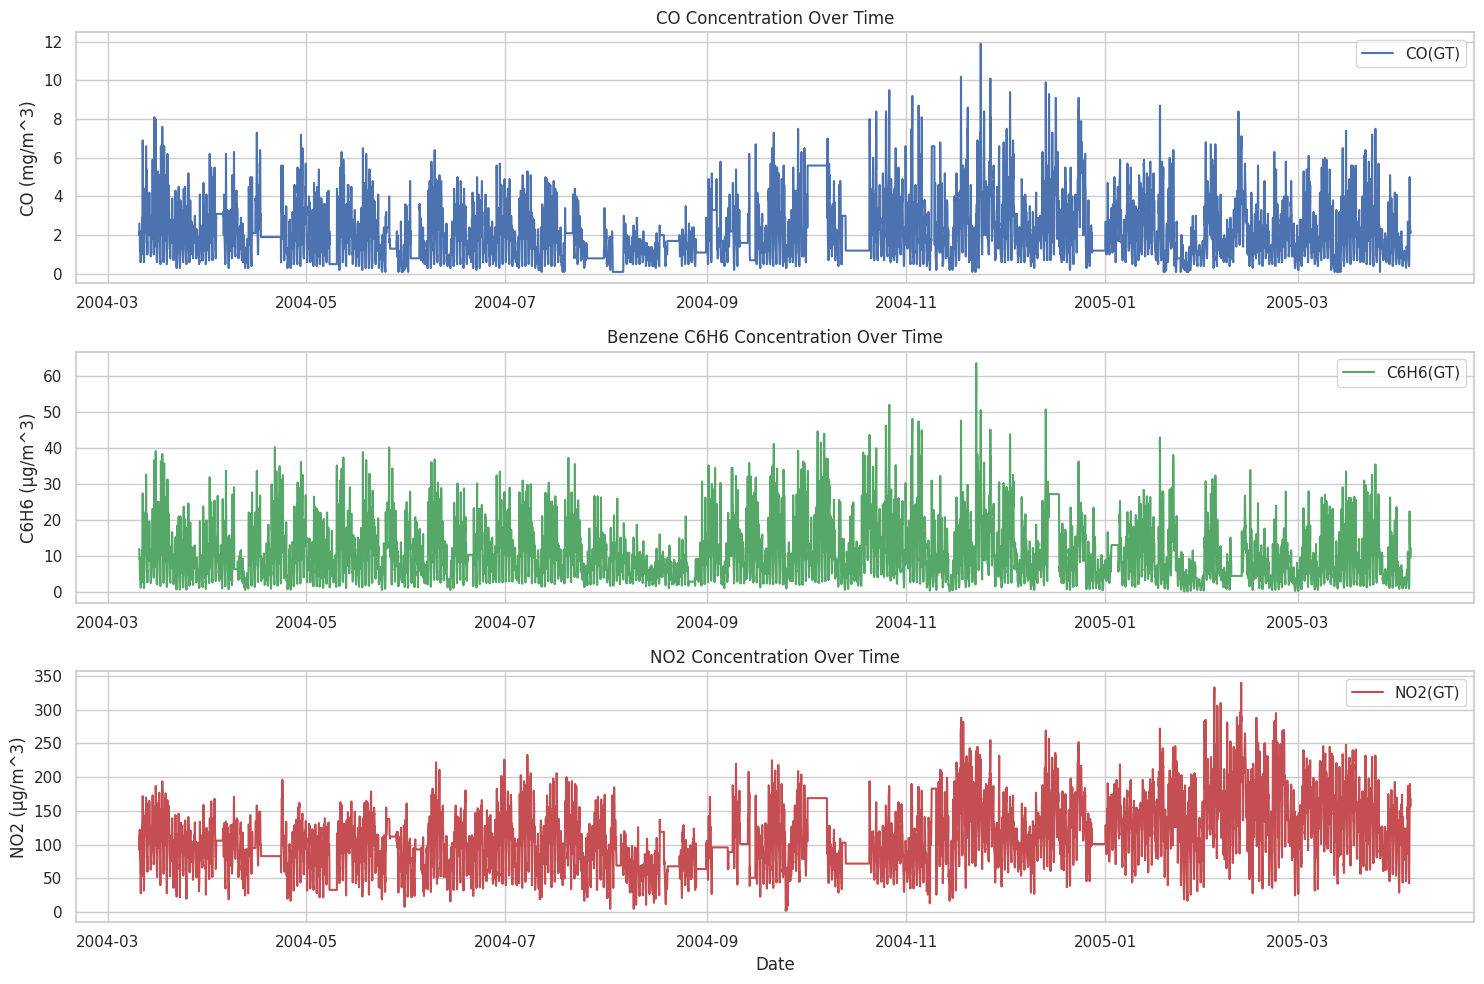


--- Correlation Heatmap ---


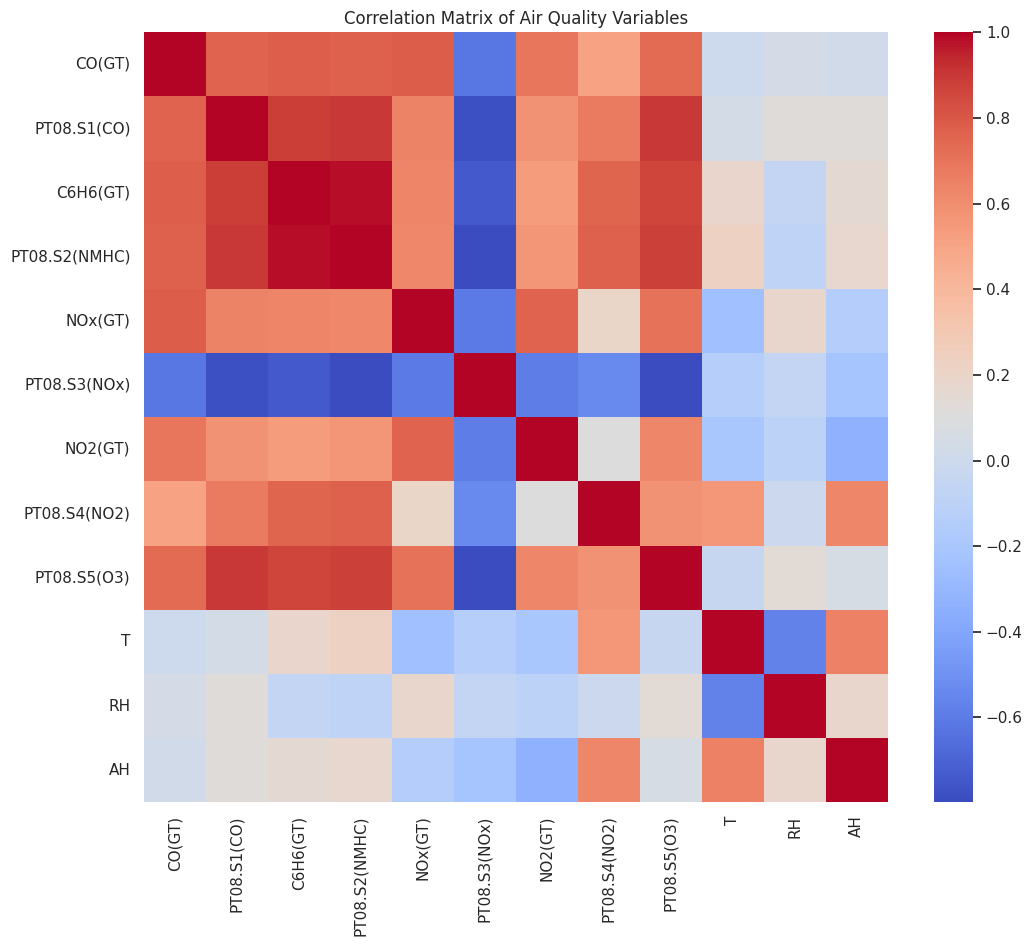

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for our plots
sns.set(style="whitegrid")

# --- Visualize Pollutants Over Time ---
print("--- Plotting Pollutant Concentrations Over Time ---")

# We'll look at a few key pollutants: CO, C6H6 (Benzene), and NO2
plt.figure(figsize=(15, 10))

# Plot CO(GT)
plt.subplot(3, 1, 1) # (rows, columns, panel number)
plt.plot(df_clean.index, df_clean['CO(GT)'], label='CO(GT)', color='b')
plt.title('CO Concentration Over Time')
plt.ylabel('CO (mg/m^3)')
plt.legend()

# Plot C6H6(GT)
plt.subplot(3, 1, 2)
plt.plot(df_clean.index, df_clean['C6H6(GT)'], label='C6H6(GT)', color='g')
plt.title('Benzene C6H6 Concentration Over Time')
plt.ylabel('C6H6 (µg/m^3)')
plt.legend()

# Plot NO2(GT)
plt.subplot(3, 1, 3)
plt.plot(df_clean.index, df_clean['NO2(GT)'], label='NO2(GT)', color='r')
plt.title('NO2 Concentration Over Time')
plt.ylabel('NO2 (µg/m^3)')
plt.xlabel('Date')
plt.legend()

plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()


# --- Analyze the Correlation Between Variables ---
print("\n--- Correlation Heatmap ---")

plt.figure(figsize=(12, 10))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Air Quality Variables')
plt.show()

Feature Engineering & Defining the Target


In [4]:
# --- 1. Create the Target Variable: 'Pollution_Level' ---

# We'll use C6H6(GT) to define our pollution levels.
# Let's find the quartiles to create 4 balanced categories.
quantiles = df_clean['C6H6(GT)'].quantile([0.25, 0.5, 0.75])

# Define a function to classify each row
def classify_pollution(c6h6_level):
    if c6h6_level <= quantiles[0.25]:
        return 'Low'
    elif c6h6_level <= quantiles[0.5]:
        return 'Medium'
    elif c6h6_level <= quantiles[0.75]:
        return 'High'
    else:
        return 'Very High'

# Apply the function to create our target column
df_clean['Pollution_Level'] = df_clean['C6H6(GT)'].apply(classify_pollution)


# --- 2. Create Time-Based Features ---

df_clean['Hour'] = df_clean.index.hour
df_clean['DayOfWeek'] = df_clean.index.dayofweek # Monday=0, Sunday=6
df_clean['Month'] = df_clean.index.month


# --- Let's check our new features! ---
print("--- Dataframe with New Features ---")

# Display the head to see the new columns
print("\nFirst 5 rows with new features:")
print(df_clean[['C6H6(GT)', 'Pollution_Level', 'Hour', 'DayOfWeek', 'Month']].head())

# Check the distribution of our new target variable
print("\nDistribution of Pollution Levels:")
print(df_clean['Pollution_Level'].value_counts())

--- Dataframe with New Features ---

First 5 rows with new features:
                     C6H6(GT) Pollution_Level  Hour  DayOfWeek  Month
DateTime                                                             
2004-03-10 18:00:00      11.9            High    18          2      3
2004-03-10 19:00:00       9.4            High    19          2      3
2004-03-10 20:00:00       9.0            High    20          2      3
2004-03-10 21:00:00       9.2            High    21          2      3
2004-03-10 22:00:00       6.5          Medium    22          2      3

Distribution of Pollution Levels:
Pollution_Level
Low          2385
Medium       2330
Very High    2328
High         2314
Name: count, dtype: int64


Build, Train, and Evaluate the Model

--- Training the model... ---
Model training complete!

Model Accuracy: 99.84%

--- Classification Report ---
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       463
         Low       1.00      1.00      1.00       477
      Medium       1.00      1.00      1.00       466
   Very High       1.00      1.00      1.00       466

    accuracy                           1.00      1872
   macro avg       1.00      1.00      1.00      1872
weighted avg       1.00      1.00      1.00      1872


--- Confusion Matrix ---


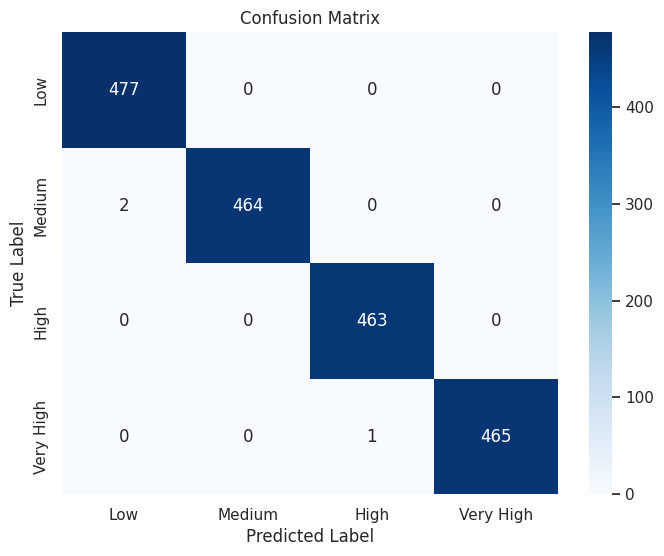

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Define Features (X) and Target (y) ---

# The target 'y' is what we want to predict.
y = df_clean['Pollution_Level']

# The features 'X' are all the other columns the model will use to make the prediction.
# We drop the original pollutant concentration and our target variable from the features.
X = df_clean.drop(columns=['Pollution_Level', 'C6H6(GT)'])


# --- 2. Split Data into Training and Testing Sets ---

# We'll use 80% of the data for training and 20% for testing.
# random_state=42 ensures that the split is the same every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# --- 3. Train the Random Forest Classifier ---

# We create an instance of the model. n_estimators=100 means it will use 100 decision trees.
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the training data
print("--- Training the model... ---")
model.fit(X_train, y_train)
print("Model training complete!")


# --- 4. Make Predictions and Evaluate the Model ---

# Make predictions on the unseen test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Display a detailed classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Display the confusion matrix as a heatmap
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High', 'Very High'],
            yticklabels=['Low', 'Medium', 'High', 'Very High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()